In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import networkx as nx
import json

A) Python

In [2]:
### Importation des documents et conversion en dataframes

data_movies= pd.read_csv('/Users/veroniquedemianenko/Desktop/data-engineer/movies.csv')

with open('/Users/veroniquedemianenko/Desktop/data-engineer/new_articles.json','r') as f:
    json_new_articles= json.load(f)

data_news_articles=pd.read_csv('/Users/veroniquedemianenko/Desktop/data-engineer/news_articles.csv')

data_new_articles=pd.DataFrame(json_new_articles)

data_reviews=pd.read_csv('/Users/veroniquedemianenko/Desktop/data-engineer/reviews.csv')
#print(data_movies)
#print(type(data_new_articles)) 

news_articles = pd.concat([data_new_articles, data_news_articles, data_reviews], ignore_index=True)
#print(news_articles)

### Obtention d'un fichier json qui répertorie les films et leurs parutions dans des journaux ou autres média

mentions={}

for film in data_movies['title']:
    mention_article= []
    for index, row in news_articles.iterrows():
        if film in row['title']:
            article_info= {
                'title': row['title'],
                'date': row['date'],
                'journal': row['journal'],
                'media': row['media']
            }
            mention_article.append(article_info)
    mentions[film] = mention_article

json_output = json.dumps(mentions, ensure_ascii=False, indent=2)

with open('mentions_films.json', 'w', encoding='utf-8') as f:
    f.write(json_output)

    id                                              title              date  \
0    9  Le chant du loup: un thriller français très ré...        01/01/2020   
1   10  Snatch: la nouvelle comédie de Guy Ritchie, en...        14/12/2000   
2   11                  Omar Sy brille dans Intouchables.        01/12/2011   
3    1        Qui fera mieux que Titanic pour les Oscars?        01/01/2003   
4    2  De Gladiator à Master and Commander, retour su...        01/01/2004   
5    3  Il faut absolument que vous alliez voir Intouc...        02/11/2011   
6    4  Snatch: ça faisait longtemps qu'on n'avait pas...        14/10/2000   
7    A          Le chant du loup: on reste sur notre faim    1 January 2018   
8    B       Le film de la rentrée, c'est \xc3\xb1 Snatch    1 Octobre 2002   
9    C                                                       1 January 2020   
10   D  Le Seigneur des Anneaux: le retour du roi égal...  14 December 2003   

       journal          media  
0     Le Monde     

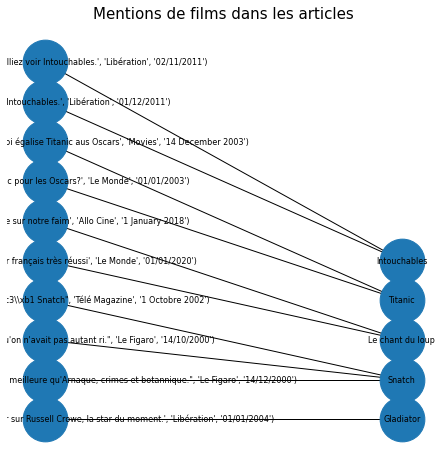

In [54]:
### Obtention d'un seul graphe pour tous les films avec networkx
G = nx.Graph()

film_nom = list(mentions.keys())
#print(films)
articles = []

for film, film_info in mentions.items():
    for info in film_info:
        article_title = info['title']
        if 'journal' in info and not pd.isna(info['journal']):
            source_title=info['journal']
        elif 'media' in info and not pd.isna(info['media']):
            source_title=info['media']
        date=info['date']
        articles.append((article_title, source_title, date))
        G.add_edge(film, (article_title, source_title, date))


film_positions = {film: (2, idx) for idx, film in enumerate(film_nom)}
article_positions = {article: (1, idx) for idx, article in enumerate(articles)}

positions = {**film_positions, **article_positions}

plt.figure(figsize=(6, 6))
nx.draw(G, pos=positions, with_labels=True, node_size=2000, font_size=8)

# Ajout de titres et affichage
plt.title('Mentions de films dans les articles', fontsize=15)
plt.show()

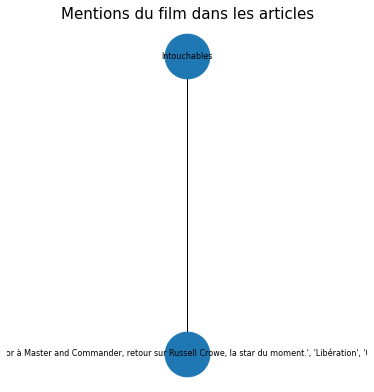

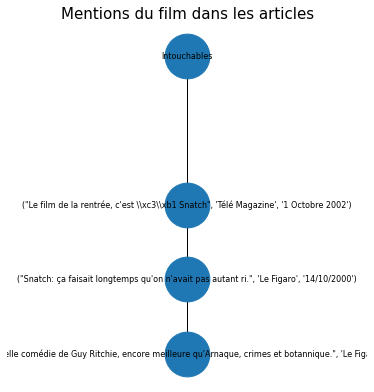

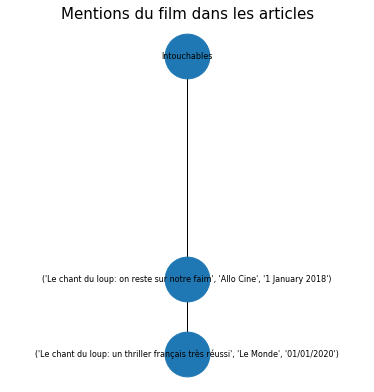

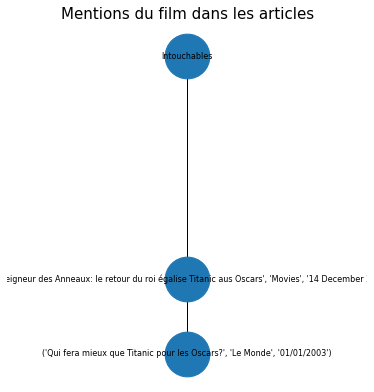

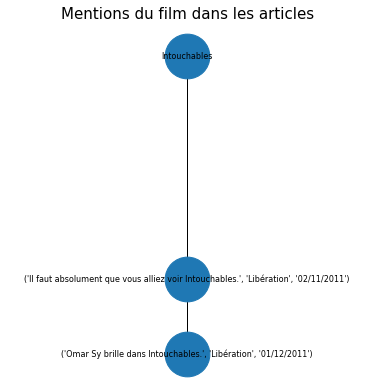

In [77]:
### Obtention d'un graphe par film avec networkx
for film_nom in list(mentions.keys()):

    G = nx.Graph()
    articles = []

    for film_info in mentions[film_nom]:

        article_title = film_info['title']
        if 'journal' in film_info and not pd.isna(film_info['journal']):
            source_title= film_info['journal']
        elif 'media' in film_info and not pd.isna(film_info['media']):
            source_title=film_info['media']
        date=film_info['date']
        articles.append((article_title, source_title, date))
        G.add_edge(film, (article_title, source_title, date))
    
    film_positions = {film: (1, idx) for idx, film in enumerate(list(mentions.keys()))}
    article_positions = {article: (1, idx) for idx, article in enumerate(articles)}

    positions = {**film_positions, **article_positions}

    plt.figure(figsize=(5, 5))
    nx.draw(G, pos=positions, with_labels=True, node_size=2000, font_size=8)

    plt.title('Mentions du film dans les articles', fontsize=15)
    plt.show()

In [95]:
import math
"""
Extraire depuis le json produit par la data pipeline le nom du journal qui mentionne le plus de films différents ?
"""

with open('/Users/veroniquedemianenko/Desktop/data-engineer/mentions_films.json','r') as f:
    fichier_json= json.load(f)

journal_film = {}

# Lecture de chaque film et ses mentions
for film, mentions_list in mentions.items():
    for mention in mentions_list:
        journal_name = mention.get('journal')
        if pd.notna(journal_name):
            if journal_name not in journal_film:
                journal_film[journal_name] = set()
            journal_film[journal_name].add(film)

max_journal = []
max_count = [0]

for journal, films in journal_film.items():
    if len(films) >= max_count[-1]:
        max_count.append(len(films))
        max_journal.append(journal)
del max_count[0]

print(f"Les journaux qui mentionnent le plus de films différents sont '{max_journal}' avec {max_count} films différents mentionnés respectivement.")


Les journaux qui mentionnent le plus de films différents sont '['Libération', 'Le Monde']' avec [2, 2] films différents mentionnés respectivement.


- Quels sont les éléments à considérer pour faire évoluer votre code afin qu’il puisse gérer de grosses volumétries de données (fichiers de plusieurs To ou millions de fichiers par exemple) ?
- Pourriez-vous décrire les modifications qu’il faudrait apporter, s’il y en a, pour prendre en considération de telles volumétries ? 

Il serait possible de modifier le code en remplaçant la librairie Pandas par la librairie Dask qui est plus rapide et plus optimisée pour les grosses volumétries de données (lecture, traitement de données)

import dask.dataframe as dd

Pour de plus gros volumes de données il serait plus difficile de lire des graphes de liaison : utiliser une autre librairie que networkx



B) SQL

SELECT COUNT(id)
FROM application
WHERE downloads > 100000;

SELECT AVG(rating)
FROM review r
JOIN application a ON a.id= r.app_id
WHERE a.name = "DUNK";

SELECT name
FROM application a
JOIN review r ON a.id = r.app_id
GROUP BY name
ORDER BY AVG(rating) DESC
LIMIT 10;

SELECT category
FROM application a
JOIN review r ON a.id = r.app_id
GROUP BY category
ORDER BY AVG(rating) DESC
LIMIT 1